# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Dicky Candid Saragih]
- **Email:** [dickysaragih050901@gmail.com]
- **ID Dicoding:** [Dicky candid saragh (a352ybf127)]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kecepatan angin terhadap jumlah peminjaman sepeda?

- Apakah terdapat perbedaan pola peminjaman sepeda antara pengguna casual dan registered pada akhir pekan dan hari kerja?

##**Menyaipkan semua library yang dibuthkan**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##**Data Wrangling**

##**Gathering Data**

In [30]:
URL_DAY = "https://raw.githubusercontent.com/DickySaragih/Submission/refs/heads/main/data/day.csv"
URL_HOUR ="https://raw.githubusercontent.com/DickySaragih/Submission/refs/heads/main/data/hour.csv"

df_day = pd.read_csv(URL_DAY)
df_hour = pd.read_csv(URL_HOUR)

df_day.info()
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

##**Gathering Data**

In [31]:
print("\nMenampilkan 5 baris pertama dari dataset harian:")
print(df_day.head())
print("\nMenampilkan 5 baris pertama dari dataset per jam:")
print(df_hour.head())


Menampilkan 5 baris pertama dari dataset harian:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  134

##**Assessing Data**

In [32]:
print("\nStatistik deskriptif dataset harian:")
print(df_day.describe())
print("\nStatistik deskriptif dataset per jam:")
print(df_hour.describe())


Statistik deskriptif dataset harian:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0

##**Cleaning Data**

In [33]:

df_day.drop_duplicates(inplace=True)
df_hour.drop_duplicates(inplace=True)

df_day.fillna(method='ffill', inplace=True)
df_hour.fillna(method='ffill', inplace=True)

print("\nCek nilai yang hilang setelah cleaning:")
print("Dataset harian:")
print(df_day.isnull().sum())
print("Dataset per jam:")
print(df_hour.isnull().sum())



Cek nilai yang hilang setelah cleaning:
Dataset harian:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Dataset per jam:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


<ipython-input-33-64f6fdc125e3>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_day.fillna(method='ffill', inplace=True)
<ipython-input-33-64f6fdc125e3>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_hour.fillna(method='ffill', inplace=True)


##**Exploratory Data Analysis (EDA)**

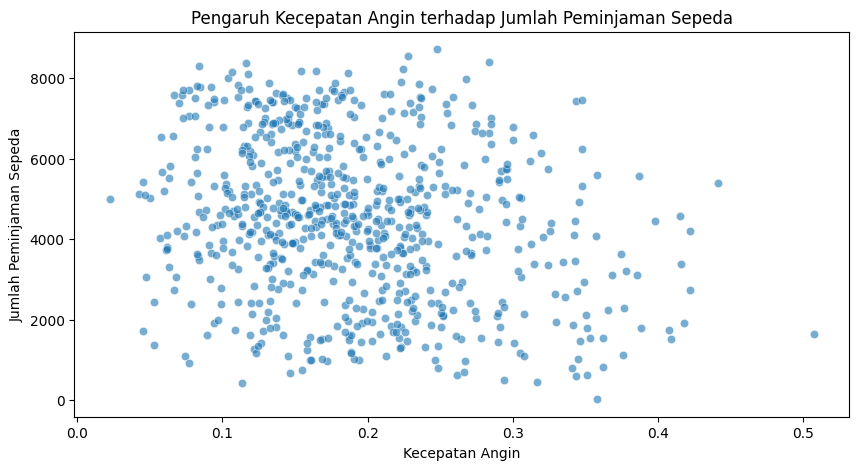

<Figure size 800x500 with 0 Axes>

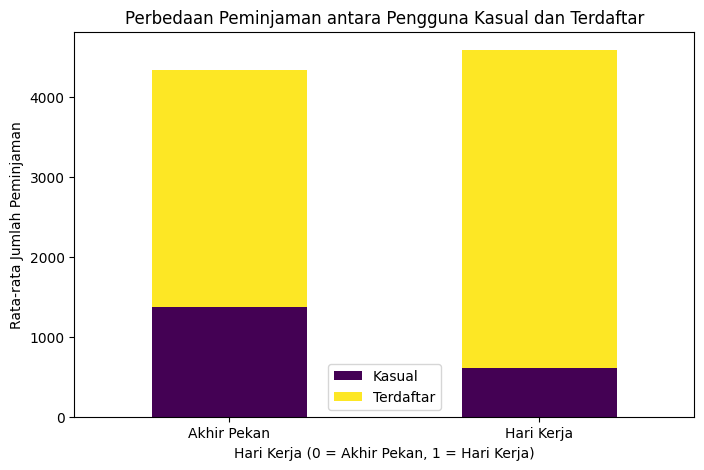

In [34]:

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_day["windspeed"], y=df_day["cnt"], alpha=0.6)
plt.title("Pengaruh Kecepatan Angin terhadap Jumlah Peminjaman Sepeda")
plt.xlabel("Kecepatan Angin")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()


weekend_vs_weekday = df_day.groupby("workingday")[["casual", "registered"]].mean()

plt.figure(figsize=(8, 5))
weekend_vs_weekday.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="viridis")
plt.title("Perbedaan Peminjaman antara Pengguna Kasual dan Terdaftar")
plt.xlabel("Hari Kerja (0 = Akhir Pekan, 1 = Hari Kerja)")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.xticks(ticks=[0, 1], labels=["Akhir Pekan", "Hari Kerja"], rotation=0)
plt.legend(["Kasual", "Terdaftar"])
plt.show()



##**Menyimpan Hasil dari analisis Data ke file csv**

In [37]:
from google.colab import files

df_day.to_csv('df_day_analysis.csv', index=False)
files.download('df_day_analysis.csv')

df_hour.to_csv('df_hour_analysis.csv', index=False)
files.download('df_hour_analysis.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion

# Kesimpulan:

- Berdasarkan scatter plot, kecepatan angin menunjukkan sedikit pengaruh terhadap jumlah peminjaman sepeda.  Meskipun ada beberapa titik yang menunjukkan tren penurunan jumlah peminjaman pada kecepatan angin tinggi, hubungannya tidak begitu jelas dan perlu analisis lebih lanjut untuk memastikan korelasi yang signifikan.

- Grafik batang menunjukkan perbedaan pola peminjaman antara pengguna casual dan registered. Pengguna registered cenderung menyewa sepeda lebih banyak di hari kerja dibandingkan akhir pekan, sementara pengguna casual menunjukkan pola sebaliknya.  Hal ini mengindikasikan bahwa pengguna terdaftar kemungkinan menggunakan sepeda untuk komuter, sedangkan pengguna kasual menggunakannya untuk rekreasi atau aktivitas di akhir pekan.
